In [19]:
x_old = 0
x_new = 6 # The algorithm starts at x=6
eps = 0.01 # step size
precision = 0.00001b 

def f_prime(x):
    return 4 * x**3 - 9 * x**2

while abs(x_new - x_old) > precision:
    x_old = x_new
    x_new = x_old - eps * f_prime(x_old)

print("Local minimum occurs at: " + str(x_new))

Local minimum occurs at: 2.2499646074278457


In [2]:
wine= pd.read_csv('data/wine.csv', index_col=0)
wine['taste']=[1. if grade>5 else 0. for grade in wine['quality']]
X=wine.drop(['taste', 'quality'], axis=1)
y= wine['taste']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =13)

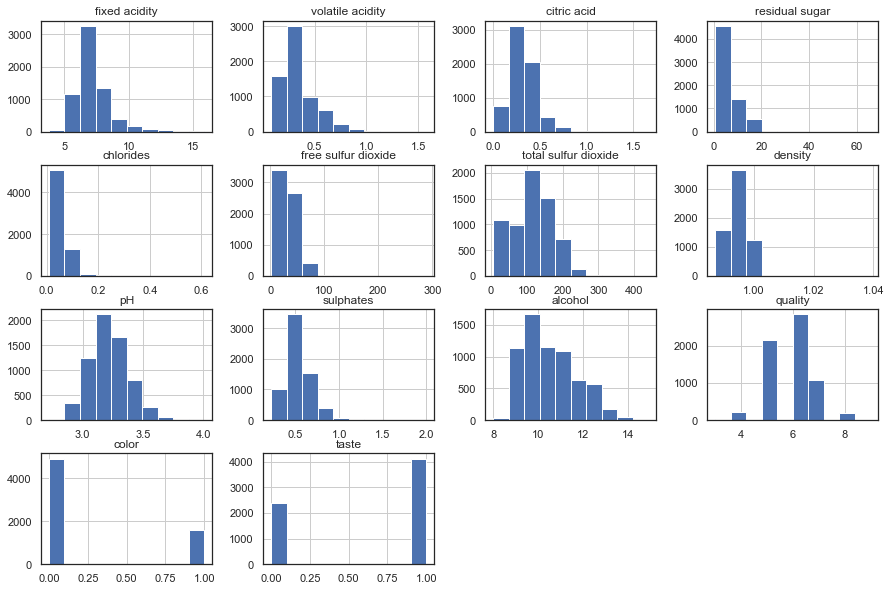

In [4]:
import matplotlib.pyplot as plt
wine.hist(bins=10, figsize=(15,10))
plt.show()

In [5]:
corr_matrix = wine.corr()
corr_matrix['quality'].sort_values(ascending=False)


quality                 1.000000
taste                   0.814484
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
color                  -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

<AxesSubplot:xlabel='taste', ylabel='count'>

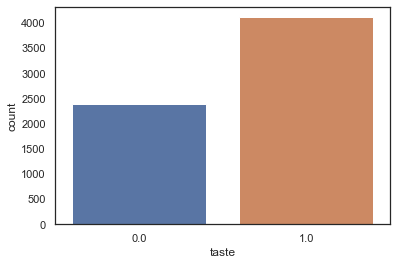

In [6]:
import seaborn as sns
sns.countplot(wine['taste'])

In [7]:
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, 
                              RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models=[]
models.append(("RF", RandomForestClassifier()))
models.append(("DC", DecisionTreeClassifier()))
models.append(("Ada", AdaBoostClassifier()))
models.append(("GBC", GradientBoostingClassifier()))
models.append(("LR", LogisticRegression()))

In [8]:
from sklearn.model_selection import KFold, cross_val_score
results = []
names=[]
for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle = True)
    cv_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_result)
    names.append(name)
    print(name, cv_result.mean(), cv_result.std())

RF 0.819120085881395 0.016852876811436074
DC 0.7538933515954689 0.012252774827702814
Ada 0.7533103205745169 0.02644765901536818
GBC 0.7665884356259718 0.021614689094861146
LR 0.736382801510328 0.011017091648732194


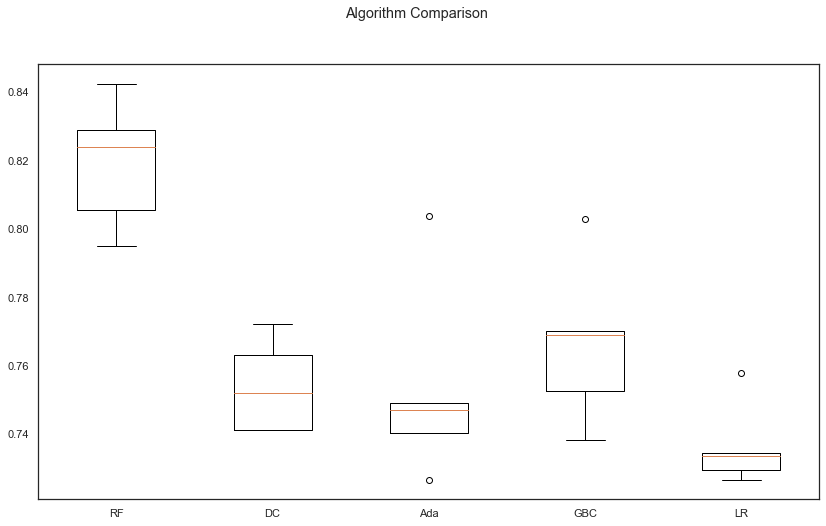

In [9]:
fig=plt.figure(figsize=(14,8))
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name, accuracy_score(y_test, pred))

RF 0.833076923076923
DC 0.7615384615384615
Ada 0.7553846153846154
GBC 0.7884615384615384
LR 0.7330769230769231
